#### Análise Exploratória de Dados
Link do Dataset: [Coffee Sales](https://www.kaggle.com/datasets/ihelon/coffee-sales)


##### Importando os dados

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 39)

df = pd.read_csv('../dados/index.csv')

In [2]:
print(f'Linhas {df.shape[0]} - Colunas {df.shape[1]}')

Linhas 1917 - Colunas 6


In [3]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


##### Limpeza e Preparação dos Dados

- Identificando e Tratando valores ausentes NaN (Not a Number)

In [4]:
df.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [5]:
df['card'] = df['card'].fillna('-')

- Alterando o tipo de dado das colunas do dataset

In [6]:
# Converte as colunas de data para datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Converte a coluna 'money' para float
df['money'] = df['money'].astype(float)

# Seleciona somente as colunas categoricas do dataset
colunas_categoricas = [col for col in df.columns if df[col].dtypes == 'object' and df[col].nunique() > 2]
df[colunas_categoricas] = df[colunas_categoricas].astype('category')

# Visualiza o tipo de dado
df.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                 category
money                 float64
coffee_name          category
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1917 non-null   datetime64[ns]
 1   datetime     1917 non-null   datetime64[ns]
 2   cash_type    1917 non-null   object        
 3   card         1917 non-null   category      
 4   money        1917 non-null   float64       
 5   coffee_name  1917 non-null   category      
dtypes: category(2), datetime64[ns](2), float64(1), object(1)
memory usage: 88.1+ KB


In [8]:
df.describe()

,date,datetime,money
count,1917,1917,1917.000000
mean,2024-07-04 12:17:39.154929408,2024-07-05 03:05:41.579991296,31.560584
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000
25%,2024-05-15 00:00:00,2024-05-15 11:19:10.048999936,27.920000
50%,2024-07-11 00:00:00,2024-07-11 22:30:58.540999936,32.820000
75%,2024-09-03 00:00:00,2024-09-03 18:48:34.747000064,35.760000
max,2024-10-13 00:00:00,2024-10-13 20:43:04.928000,40.000000
std,NaN,NaN,5.260794


##### Resumindo os dados com Tabelas de Frequência

In [9]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [10]:
# Calcula a frequência absoluta e relativa para o tipo de café
frequencia = df['coffee_name'].value_counts()
frequencia_relativa = df['coffee_name'].value_counts(normalize=True) * 100

# Cria o DataFrame com frequência e frequência relativa
tb_frequencia_cafe = pd.DataFrame({'Frequência': frequencia,
                                   'Frequência Relativa (%)': frequencia_relativa})

# Ajusta o nome da coluna e reseta o índice
tb_frequencia_cafe.rename_axis('Tipo de Café', inplace=True)
tb_frequencia_cafe.reset_index(inplace=True)

# Calcula a frequência acumulada e relativa acumulada
tb_frequencia_cafe['Frequência Acumulada'] = tb_frequencia_cafe['Frequência'].cumsum()
tb_frequencia_cafe['Frequência Relativa Acumulada (%)'] = (tb_frequencia_cafe['Frequência Acumulada'] / tb_frequencia_cafe['Frequência'].sum()) * 100

tb_frequencia_cafe

,Tipo de Café,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
0,Americano with Milk,476,24.830464,476,24.830464
1,Latte,435,22.691706,911,47.522170
2,Cappuccino,288,15.023474,1199,62.545644
3,Americano,261,13.615023,1460,76.160668
4,Cortado,198,10.328638,1658,86.489306
5,Hot Chocolate,118,6.155451,1776,92.644757
6,Espresso,79,4.121022,1855,96.765780
7,Cocoa,62,3.234220,1917,100.000000


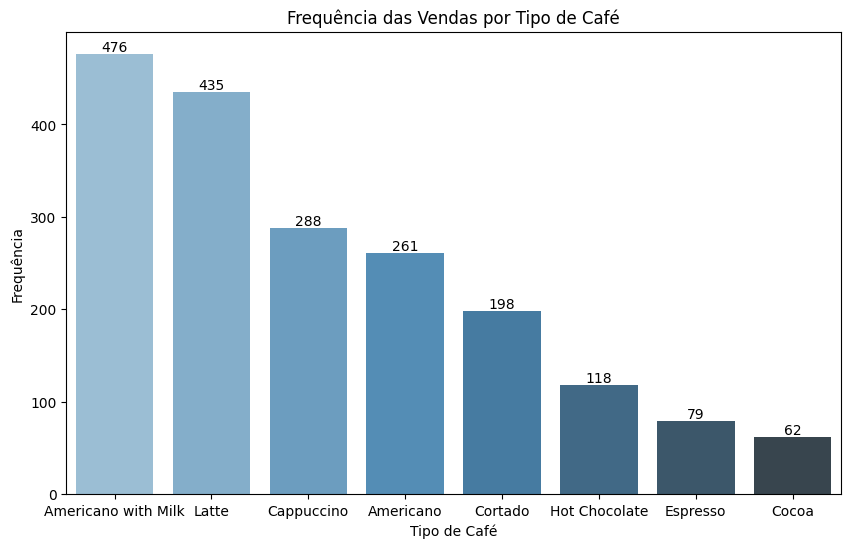

In [11]:
plt.figure(figsize=(10,6))
plt.title('Frequência das Vendas por Tipo de Café')

# Adiciona gráfico de barras ordenado por frequência
ax = sns.barplot(data=tb_frequencia_cafe, 
                 x='Tipo de Café', 
                 y='Frequência', 
                 palette='Blues_d', 
                 order=tb_frequencia_cafe['Tipo de Café'])

# Adicionar rótulos de dados usando ax.bar_label()
for container in ax.containers:
    ax.bar_label(container)

plt.show();

In [12]:
metodo_pagamento = pd.pivot_table(data=df,
                                  index='coffee_name',
                                  columns='cash_type',
                                  values='money',
                                  aggfunc='sum').round()

metodo_pagamento.rename_axis('Tipo de Café', inplace=True)
metodo_pagamento.reset_index(inplace=True)
metodo_pagamento.columns.name = None
metodo_pagamento = metodo_pagamento.rename(columns={'card': 'Cartão',
                                                    'cash': 'Dinheiro'})
metodo_pagamento[['Cartão', 'Dinheiro']] = metodo_pagamento[['Cartão',
                                                             'Dinheiro']].astype('int')
metodo_pagamento

,Tipo de Café,Cartão,Dinheiro
0,Americano,6421,412
1,Americano with Milk,14012,518
2,Cappuccino,9822,595
3,Cocoa,2049,157
4,Cortado,4945,150
5,Espresso,1532,124
6,Hot Chocolate,4069,239
7,Latte,14467,991


In [13]:
# Transformar os dados para o formato longo
metodo_pagamento_long = pd.melt(metodo_pagamento, id_vars='Tipo de Café', 
                                value_vars=['Cartão', 'Dinheiro'], 
                                var_name='Método de Pagamento', 
                                value_name='Valor')
metodo_pagamento_long.head(3)

,Tipo de Café,Método de Pagamento,Valor
0,Americano,Cartão,6421
1,Americano with Milk,Cartão,14012
2,Cappuccino,Cartão,9822


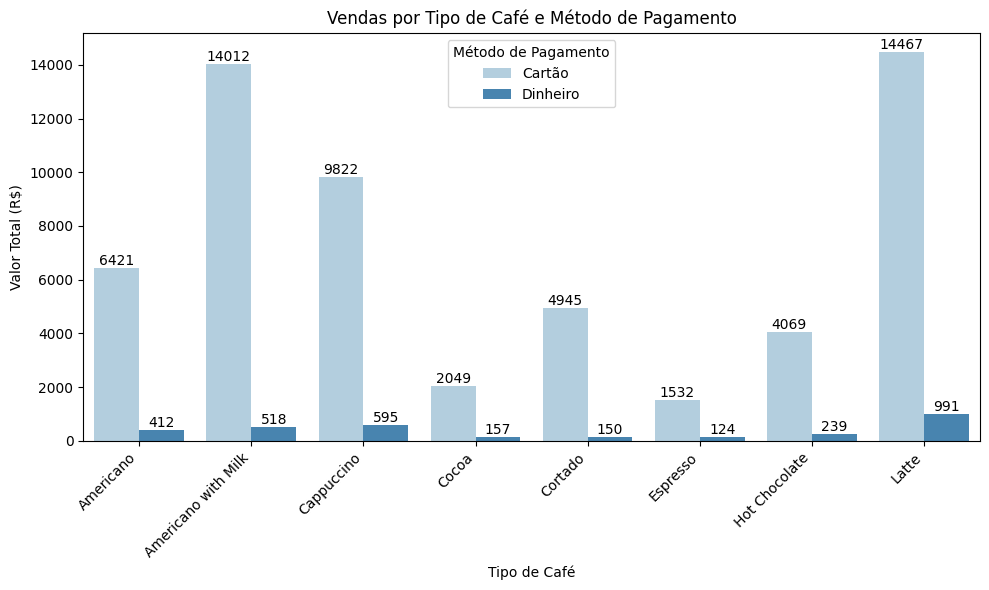

In [14]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=metodo_pagamento_long,
                 x='Tipo de Café',
                 y='Valor',
                 hue='Método de Pagamento',
                 palette='Blues')

plt.title('Vendas por Tipo de Café e Método de Pagamento')
plt.ylabel('Valor Total (R$)')
plt.xlabel('Tipo de Café')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adicionar rótulos de dados usando ax.bar_label()
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [15]:
# Cria a tabela de vendas por data, tipo de pagamento e 
tb_tipo_vendas = df.groupby(['date', 'cash_type']).agg(
                    min_vendas=pd.NamedAgg('money', 'min'),
                    max_vendas=pd.NamedAgg('money', 'max'),
                    mean_vendas=pd.NamedAgg('money', 'mean'),
                    sum_vendas=pd.NamedAgg('money', 'sum')).reset_index()

# Renomeia as colunas do DataFrame
tb_tipo_vendas.rename(columns={'date': 'Data da Venda',
                              'cash_type': 'Tipo de Venda',
                              'min_vendas':'Valor Mínimo',
                              'max_vendas': 'Valor Máximo',
                              'mean_vendas': 'Média de Vendas',
                              'sum_vendas': 'Total em Vendas'},
                              inplace=True)
tb_tipo_vendas = tb_tipo_vendas.round()
tb_tipo_vendas.head(3)

,Data da Venda,Tipo de Venda,Valor Mínimo,Valor Máximo,Média de Vendas,Total em Vendas
0,2024-03-01,card,29.0,39.0,36.0,396.0
1,2024-03-02,card,29.0,34.0,31.0,188.0
2,2024-03-02,cash,40.0,40.0,40.0,40.0


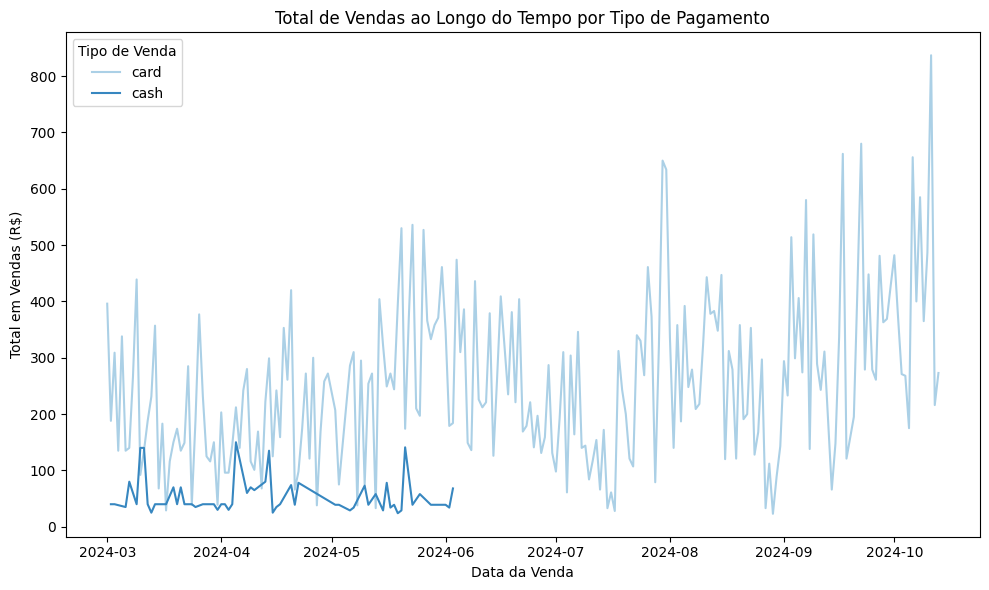

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=tb_tipo_vendas, 
                   x='Data da Venda', 
                   y='Total em Vendas', 
                   hue='Tipo de Venda',
                   palette='Blues')

# Título e rótulos dos eixos
plt.title('Total de Vendas ao Longo do Tempo por Tipo de Pagamento')
plt.ylabel('Total em Vendas (R$)')
plt.xlabel('Data da Venda')
plt.tight_layout()

plt.show()

In [17]:
# Cria a tabela de vendas por data e tipo de café
tb_vendas_dia = pd.pivot_table(df, index='date', columns='coffee_name', values='money')

# Ajusta o nome da coluna e reseta o índice
tb_vendas_dia.rename_axis('Data da Venda', inplace=True)
tb_vendas_dia.reset_index(inplace=True)
tb_vendas_dia.columns.name = None

# Substitui valores ausentes por 0
tb_vendas_dia = tb_vendas_dia.fillna(0)
tb_vendas_dia = tb_vendas_dia.round()
tb_vendas_dia['Total'] = tb_vendas_dia.drop(['Data da Venda'], axis=1).sum(axis=1)
tb_vendas_dia.head()

,Data da Venda,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,Total
0,2024-03-01,29.0,34.0,0.0,39.0,0.0,0.0,39.0,39.0,180.0
1,2024-03-02,29.0,34.0,0.0,0.0,0.0,0.0,0.0,40.0,103.0
2,2024-03-03,29.0,34.0,0.0,39.0,29.0,0.0,39.0,39.0,209.0
3,2024-03-04,0.0,34.0,0.0,0.0,0.0,24.0,0.0,39.0,97.0
4,2024-03-05,0.0,0.0,0.0,39.0,29.0,0.0,39.0,39.0,146.0


In [20]:
tb_vendas_dia_long = pd.melt(tb_vendas_dia, 
                         id_vars=['Data da Venda'],
                         value_vars=['Americano', 'Americano with Milk', 'Cappuccino', 'Cocoa', 'Cortado', 'Espresso', 'Hot Chocolate', 'Latte'],
                         var_name='Tipo de Café',
                         value_name='Total em Vendas')
tb_vendas_dia_long.head()

,Data da Venda,Tipo de Café,Total em Vendas
0,2024-03-01,Americano,29.0
1,2024-03-02,Americano,29.0
2,2024-03-03,Americano,29.0
3,2024-03-04,Americano,0.0
4,2024-03-05,Americano,0.0


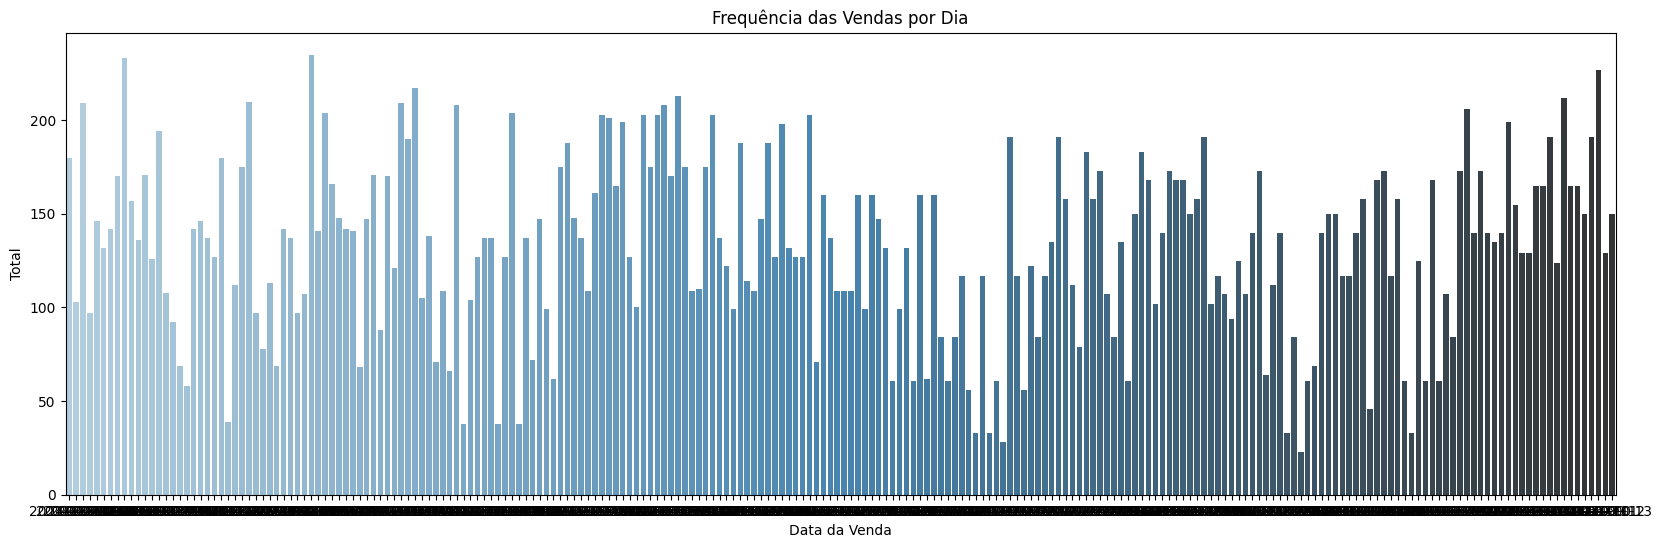

In [19]:
plt.figure(figsize=(20,6))
plt.title('Frequência das Vendas por Dia')

# Adiciona gráfico de barras ordenado por frequência
sns.barplot(data=tb_vendas_dia, 
            x='Data da Venda', 
            y='Total', 
            palette='Blues_d')
plt.show();